# Ödev: 5 - Çözüm
## FİZ220 - Bilgisayar Programlama II | 01/06/2020

**Lineer Cebir Uygulamaları**

**Son gönderim tarihi:** 7 Haziran Pazar, 23:59  
<strike>**Gönderim şekli:** FIZ220_Odev_05_Grup_#.ipynb isimli jupyter ipynb formatında dosyayı ödev sayfasından göndermek suretiyle  
**Gönderecek kişi:** <u>Grup temsilcisi</u></strike>  
*Çoktan kalktı o gemi, bugün olmuş 8 Haziran Pazartesi! 8)*

Dr. Emre S. Taşcı, emre.tasci@hacettepe.edu.tr  
Fizik Mühendisliği Bölümü  
Hacettepe Üniversitesi

## 1. Soru: Eğri aslında aynı eğri
Ölçeği ayarlayıp, aşağıdaki iki grafikte verilen yayı aynı uzunluğa getirin. Eğrileri döndürmeniz ya da değerler üzerinde değişim yapmanız istenmemektedir: grafiklerden birinde (ya da dilerseniz ikisinde) x ve y eksenlerinin ölçeğini değiştirip, sonuç olarak öyle iki grafik elde edeceksiniz ki, çıktılarını alıp, sadece eğrileri kesip, üst üste koyduğumuzda birebir (/mümkün mertebe) örtüşecek boyutta olacaklar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

alpha = np.deg2rad(30) # derece -> radyan
beta = np.deg2rad(30) # derece -> radyan
V0 = 10 # m/s
g = 10 # m/s^2

t0 = (2*V0/g)*(np.sin(beta)/np.cos(alpha))

t = np.linspace(0,t0,10)
x = V0*np.cos(alpha+beta)*t
y = V0*np.sin(alpha+beta)*t - 0.5*g*t**2

plt.plot(x,y,"o-b")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Rutin Koordinatlar")
#plt.xlim(0,8)
#plt.ylim(0,4)
plt.show()

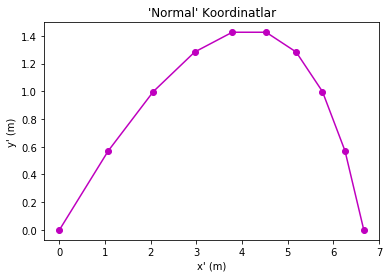

In [2]:
import numpy as np
import matplotlib.pyplot as plt

alpha = np.deg2rad(30) # derece -> radyan
beta = np.deg2rad(30) # derece -> radyan
V0 = 10 # m/s
g = 10 # m/s^2

t0 = (2*V0/g)*(np.sin(beta)/np.cos(alpha))

t = np.linspace(0,t0,10)
xp = V0*np.cos(beta)*t - 0.5*g*np.sin(alpha)*t**2
yp = V0*np.sin(beta)*t - 0.5*g*np.cos(alpha)*t**2

plt.plot(xp,yp,"o-m")
plt.xlabel("x' (m)")
plt.ylabel("y' (m)")
plt.title("'Normal' Koordinatlar")
plt.show()

## 1. Soru Çözüm

**Kısa cevap:** x ve y sınırlarını iki grafikte de aynı alarak bunu sağlarız.

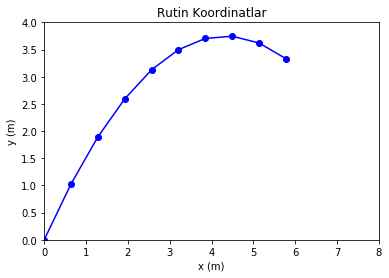

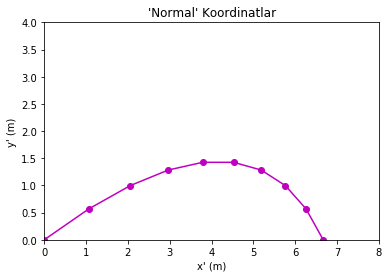

In [3]:
import numpy as np
import matplotlib.pyplot as plt

alpha = np.deg2rad(30) # derece -> radyan
beta = np.deg2rad(30) # derece -> radyan
V0 = 10 # m/s
g = 10 # m/s^2

t0 = (2*V0/g)*(np.sin(beta)/np.cos(alpha))

t = np.linspace(0,t0,10)
x = V0*np.cos(alpha+beta)*t
y = V0*np.sin(alpha+beta)*t - 0.5*g*t**2

plt.plot(x,y,"o-b")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Rutin Koordinatlar")
plt.xlim(0,8)
plt.ylim(0,4)
plt.show()

xp = V0*np.cos(beta)*t - 0.5*g*np.sin(alpha)*t**2
yp = V0*np.sin(beta)*t - 0.5*g*np.cos(alpha)*t**2

plt.plot(xp,yp,"o-m")
plt.xlabel("x' (m)")
plt.ylabel("y' (m)")
plt.xlim(0,8)
plt.ylim(0,4)
plt.title("'Normal' Koordinatlar")
plt.show()

(Noktalar arasındaki mesafeler aynı görünmüyorsa, ince bir kağıt alıp, ekranınızın üzerine koyun, iki grafikte de noktaları işaretleyip, sonrasında elinize bir cetvel alın, işaretlediğiniz kağıt üzerinde doğrudan ölçüp teyit edin. ;)

**Uzun, detaylı ve şık cevap:**

İki grafikteki eğrilerimizi hayali birer dikdörtgen içine alalım. Soruda aslında bu iki dikdörtgenin de ekranda aynı ölçekle temsil edilmesi isteniyor. Dikdörtgenleri fiilen çizmemiz gerekmese de, bu vesileyle, çok neşeli (ve aslında çok da gerekli olmayan) bir fonksiyonla, `matplotlib.patches.Rectangle()`la da tanışalım:

`matplotlib.patches.Rectangle((sol-alt-x,sol-alt-y),genişlik,yükseklik,derece-cinsinden-açı)`

(Rectangle'ın "R"sinin büyük harfle yazıldığına dikkat edin. [Buradan da komutun resmi açıklamasına](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html) ulaşabilirsiniz)

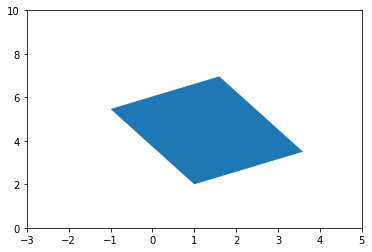

In [4]:
### matplotlib.patches.Rectangle ornegi

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig,ax = plt.subplots()
dikdortgen = mpatches.Rectangle((1,2),3,4,30)
ax.set_xlim(-3,5)
ax.set_ylim(0,10)
ax.add_patch(dikdortgen)
plt.show()



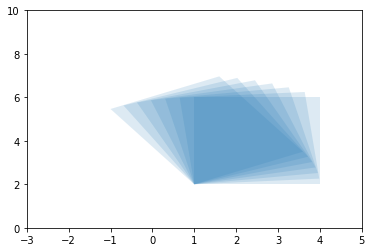

In [5]:
# alpha (şeffaflık) parametresini de kullanarak,
# önceki örneğe biraz daha artistik katalım: 8)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

seffaflik = 0.15 

fig,ax = plt.subplots()

for i in range(7):
    dikdortgen = mpatches.Rectangle((1,2),3,4,i*5,alpha=seffaflik)
    ax.add_patch(dikdortgen)

ax.set_xlim(-3,5)
ax.set_ylim(0,10)

plt.show()

Dikdörtgen çizmeyi öğrendiğimize göre, iki koordinat takımında da eğrimizi en optimize şekilde (yani en küçük boyutta dikdörtgen şeklinde kap kağıdı kullanarak) paketleyelim. Bunun için ekstrem noktaları bulalım:

  t       x      y   
------  ------ ------
 0.000   0.000  0.000
 0.128   0.642  1.029
 0.257   1.283  1.893
 0.385   1.925  2.593
 0.513   2.566  3.128
 0.642   3.208  3.498
 0.770   3.849  3.704
 0.898   4.491  3.745
 1.026   5.132  3.621
 1.155   5.774  3.333
En yuksek nokta:  4.4905020936970885 3.7448559670781885


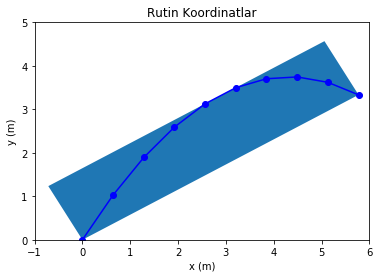

---------------------------------------------
  t       x'     y'  
------  ------ ------
 0.000   0.000  0.000
 0.128   1.070  0.570
 0.257   2.058  0.998
 0.385   2.963  1.283
 0.513   3.786  1.426
 0.642   4.527  1.426
 0.770   5.185  1.283
 0.898   5.761  0.998
 1.026   6.255  0.570
 1.155   6.667  0.000
En yuksek nokta:  4.526748971193415 1.4255562202212977


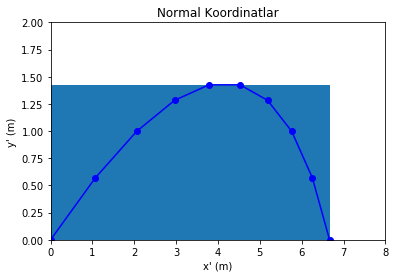

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

alpha = np.deg2rad(30) # derece -> radyan
beta = np.deg2rad(30) # derece -> radyan
V0 = 10 # m/s
g = 10 # m/s^2

t0 = (2*V0/g)*(np.sin(beta)/np.cos(alpha))

t = np.linspace(0,t0,10)

x = V0*np.cos(alpha+beta)*t
y = V0*np.sin(alpha+beta)*t - 0.5*g*t**2
xp = V0*np.cos(beta)*t - 0.5*g*np.sin(alpha)*t**2
yp = V0*np.sin(beta)*t - 0.5*g*np.cos(alpha)*t**2

# --------------------------------------------------------

print("{:^6s}  {:^6s} {:^6s}".format("t","x","y"))
print("{:^6s}  {:^6s} {:^6s}".format("------","------","------"))


for i in range(x.size):
    print("{:6.3f}  {:6.3f} {:6.3f}".format(t[i],x[i],y[i]))

## En yuksek nokta (dikdortgenimizin boyunu belirliyor)    
max_y = np.max(y) # en yuksek noktanin y bileseni

# buna gerek yok ama bulmus olalim:
max_y_x = x[y==max_y][0] # en yuksek noktanin x-bileseni
print("En yuksek nokta: ",max_y_x,max_y)

## En uc nokta (dikdortgenimizin enini belirliyor)
max_x = x[-1] # dogal olarak en son noktamiz
max_x_y = y[-1] # buna da aslinda gerek yok

uzunluk = np.linalg.norm([x[-1],y[-1]])

fig,ax = plt.subplots(1)

plt.plot(x,y,"o-b")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Rutin Koordinatlar")

# Dikdortgenimizi de cizdirelim:
rect = mpatches.Rectangle((0,0),uzunluk,np.max(yp),np.rad2deg(beta))
ax.add_patch(rect)
plt.xlim(-1,6)
plt.ylim(0,5)
plt.show()

print("-"*45)
# --------------------------------------------------------


print("{:^6s}  {:^6s} {:^6s}".format("t","x'","y'"))
print("{:^6s}  {:^6s} {:^6s}".format("------","------","------"))
for i in range(x.size):
    print("{:6.3f}  {:6.3f} {:6.3f}".format(t[i],xp[i],yp[i]))

## En yuksek nokta (dikdortgenimizin boyunu belirliyor)    
max_yp = np.max(yp) # en yuksek noktanin y bileseni

# buna gerek yok ama bulmus olalim:
max_yp_xp = xp[yp==max_yp][0] # en yuksek noktanin x-bileseni
print("En yuksek nokta: ",max_yp_xp,max_yp)

## En uc nokta (dikdortgenimizin enini belirliyor)
max_xp = xp[-1] # dogal olarak en son noktamiz
max_xp_yp = yp[-1] # buna da aslinda gerek yok

fig,ax = plt.subplots(1)

plt.plot(xp,yp,"o-b")
plt.xlabel("x' (m)")
plt.ylabel("y' (m)")
plt.title("Normal Koordinatlar")

# Dikdortgenimizi de cizdirelim:
rect = mpatches.Rectangle((0,0),max_xp,max_yp)
ax.add_patch(rect)
plt.xlim(0,8)
plt.ylim(0,2)
plt.show()


Şimdi yapmamız gereken, aslında aynı büyüklükte olan bu dikdörtgenlerin ekranda da aynı alanı kaplamaları. Grafik kutularının boyları aynı, o zaman gösterdikleri aralıkları da aynı yaparsak bu iş tamamdır:

`# İki grafiğin de en uç limitlerini alıp birleştirelim
plt.xlim(-1,8)
plt.ylim(0,5)
`

Aşağıdaki kodda bu aralıkların uygulanmış halini görüyoruz (yukarıdaki kodun aynısı, bir tek limitler değişmiş durumda):

  t       x      y   
------  ------ ------
 0.000   0.000  0.000
 0.128   0.642  1.029
 0.257   1.283  1.893
 0.385   1.925  2.593
 0.513   2.566  3.128
 0.642   3.208  3.498
 0.770   3.849  3.704
 0.898   4.491  3.745
 1.026   5.132  3.621
 1.155   5.774  3.333
En yuksek nokta:  4.4905020936970885 3.7448559670781885


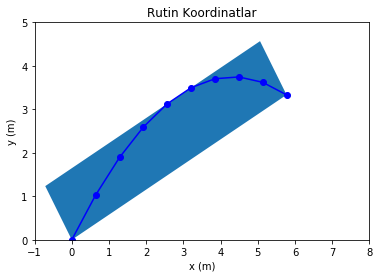

---------------------------------------------
  t       x'     y'  
------  ------ ------
 0.000   0.000  0.000
 0.128   1.070  0.570
 0.257   2.058  0.998
 0.385   2.963  1.283
 0.513   3.786  1.426
 0.642   4.527  1.426
 0.770   5.185  1.283
 0.898   5.761  0.998
 1.026   6.255  0.570
 1.155   6.667  0.000
En yuksek nokta:  4.526748971193415 1.4255562202212977


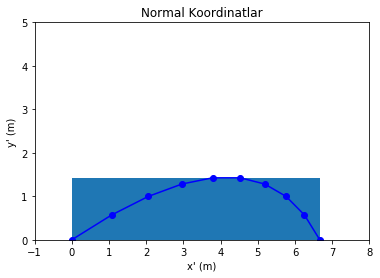

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

alpha = np.deg2rad(30) # derece -> radyan
beta = np.deg2rad(30) # derece -> radyan
V0 = 10 # m/s
g = 10 # m/s^2

t0 = (2*V0/g)*(np.sin(beta)/np.cos(alpha))

t = np.linspace(0,t0,10)

x = V0*np.cos(alpha+beta)*t
y = V0*np.sin(alpha+beta)*t - 0.5*g*t**2
xp = V0*np.cos(beta)*t - 0.5*g*np.sin(alpha)*t**2
yp = V0*np.sin(beta)*t - 0.5*g*np.cos(alpha)*t**2

# --------------------------------------------------------

print("{:^6s}  {:^6s} {:^6s}".format("t","x","y"))
print("{:^6s}  {:^6s} {:^6s}".format("------","------","------"))


for i in range(x.size):
    print("{:6.3f}  {:6.3f} {:6.3f}".format(t[i],x[i],y[i]))

## En yuksek nokta (dikdortgenimizin boyunu belirliyor)    
max_y = np.max(y) # en yuksek noktanin y bileseni

# buna gerek yok ama bulmus olalim:
max_y_x = x[y==max_y][0] # en yuksek noktanin x-bileseni
print("En yuksek nokta: ",max_y_x,max_y)

## En uc nokta (dikdortgenimizin enini belirliyor)
max_x = x[-1] # dogal olarak en son noktamiz
max_x_y = y[-1] # buna da aslinda gerek yok

uzunluk = np.linalg.norm([x[-1],y[-1]])

fig,ax = plt.subplots(1)

plt.plot(x,y,"o-b")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Rutin Koordinatlar")

# Dikdortgenimizi de cizdirelim:
rect = mpatches.Rectangle((0,0),uzunluk,np.max(yp),np.rad2deg(beta))
ax.add_patch(rect)
plt.xlim(-1,8)
plt.ylim(0,5)
plt.show()

print("-"*45)
# --------------------------------------------------------


print("{:^6s}  {:^6s} {:^6s}".format("t","x'","y'"))
print("{:^6s}  {:^6s} {:^6s}".format("------","------","------"))
for i in range(x.size):
    print("{:6.3f}  {:6.3f} {:6.3f}".format(t[i],xp[i],yp[i]))

## En yuksek nokta (dikdortgenimizin boyunu belirliyor)    
max_yp = np.max(yp) # en yuksek noktanin y bileseni

# buna gerek yok ama bulmus olalim:
max_yp_xp = xp[yp==max_yp][0] # en yuksek noktanin x-bileseni
print("En yuksek nokta: ",max_yp_xp,max_yp)

## En uc nokta (dikdortgenimizin enini belirliyor)
max_xp = xp[-1] # dogal olarak en son noktamiz
max_xp_yp = yp[-1] # buna da aslinda gerek yok

fig,ax = plt.subplots(1)

plt.plot(xp,yp,"o-b")
plt.xlabel("x' (m)")
plt.ylabel("y' (m)")
plt.title("Normal Koordinatlar")

# Dikdortgenimizi de cizdirelim:
rect = mpatches.Rectangle((0,0),max_xp,max_yp)
ax.add_patch(rect)
plt.xlim(-1,8)
plt.ylim(0,5)
plt.show()


İki eğrinin de aynı yay uzunluğuna sahip olduğunu göstermek için şık bir şey yapalım:

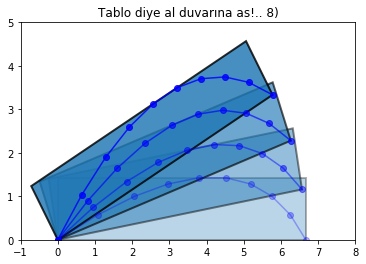

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

alpha = np.deg2rad(30) # derece -> radyan
beta = np.deg2rad(30) # derece -> radyan
V0 = 10 # m/s
g = 10 # m/s^2

t0 = (2*V0/g)*(np.sin(beta)/np.cos(alpha))

t = np.linspace(0,t0,10)

xp = V0*np.cos(beta)*t - 0.5*g*np.sin(alpha)*t**2
yp = V0*np.sin(beta)*t - 0.5*g*np.cos(alpha)*t**2

uzunluk = xp[-1]
yukseklik = np.max(yp)

# --------------------------------------------------------
fig,ax = plt.subplots(1)

# Normal koordinatlardaki temsilden, rutin koordinatlardakine kaç adımda geçileceği
N = 4


for aci in np.linspace(0,beta,N):
    seffaflik = aci+.3 # giderek gorünür olsun..
    xx = xp*np.cos(aci) - yp*np.sin(aci)
    yy = xp*np.sin(aci) + yp*np.cos(aci)
    plt.plot(xx,yy,"o-b",alpha=seffaflik)
    # Dikdortgenimizi de cizdirelim:
    rect = mpatches.Rectangle((xx[0],yy[0]),uzunluk,yukseklik,
        np.rad2deg(aci),alpha=seffaflik,edgecolor="k",linewidth=2.0,ls="-")
    ax.add_patch(rect)

# Vurucu kısım ("sadet"):
plt.xlim(-1,8)
plt.ylim(0,5)

plt.title("Tablo diye al duvarına as!.. 8)")
plt.show()

## 2. Soru: O öyle değil miydi ki hakikaten?

Bizim bildiğimiz -saatin tersi yönünde döndüren- dönüş matrisi:
$$R_{\alpha} = \begin{pmatrix}
\cos\alpha & -\sin\alpha \\ 
\sin\alpha & \cos\alpha
\end{pmatrix}$$

şeklinde değil miydi (yani "$-\sin\alpha$" sağ üstte; "$\sin\alpha$" sol altta olacak şekilde)?

Ama sistemimizi saatin tersi yönünde döndürmemize rağmen, neden 1. örnek olan eğik düzleme atış probleminde (ve diğer iki örnekte de) işlemi yaparken "$-\sin\alpha$"yı sol altta, "$\sin\alpha$"yı sağ üstte aldık?... (Açıklayın)

## 2. Soru Cevap
Sinüs fonksiyonunun sağ üstte eksi değeri olduğu matris, verilen noktaları saat yönünün tersine döndürüyor -- bütün noktaları saat yönünün tersine döndürmek için bu matrisi tek tek her bir noktaya vurdurabiliriz (*pasif dönüşüm*), **ya da** <u>koordinat sistemimizin kendisini</u> saat yönünde çevirebiliriz (*aktif dönüşüm*). Burada yaptığımız da ikinci yöntem: çevirdiğimiz şey aslında koordinat sisteminin ta kendisi -- çevirme yönü de saat yönü, yani negatif yön olduğu için $\alpha \mapsto -\alpha$.

## 3. Soru: ???
2\. örnek olan sürtünmeli eğik düzlemde kayan kütlenin 'normal' koordinat sistemindeki hareket denklemleri olan:

$$\mu F_N - mg\sin\theta = m\ddot{x}'\\
F_N - mg\cos\theta =m\ddot{y}'\\
\ddot{y}'=0$$

üç denklemi lineer denklem seti olarak matris çarpımı ile temsil ederken:

$$\begin{pmatrix}m&0&-\mu\\
0&m &-1\\
0 & 220 & 0
\end{pmatrix}\begin{pmatrix}\ddot{x}'\\\ddot{y}'\\F_N\end{pmatrix}=\begin{pmatrix}-mg\sin\theta\\-mg\cos\theta\\0\end{pmatrix}$$

şeklinde yazdık. En alt satırın orta sütunundaki "220" değeri nereden geldi? Dersimizin koduyla aynı oluşu tesadüf mü?

## 3. Soru Cevap
Elimizdeki 3. denklem, $\ddot{y}'$nün 0 olduğu ama diğer iki değişkenimiz $(\ddot{x}'\,\&\,F_N)$ 0 olmak zorunda değil, bu yüzden en alt satırı $(0\,0\,0)$ şeklinde yazamayız (yazarız da, "0 ile çarpılan her şey sıfır olur" şeklinde zaten bariz bir şeyi söylemiş oluruz (bkz. _"malumun ilam etmek"_ 8P) -- bu vesileyle, bu tür apaçık, bariz çözümlere/gerçeklere İngilizce'de "trivial" denmekte). Sadece $\ddot{y}'$nün 0 olduğunu, onu hangi sayıyla çarparsak çarpalım sonucun 0 olacağını yazarak belirtebiliriz; bu sayı dersimizin kodu da olabilir, doğum yılımız da, tamamıyla bize kalmış.

 ## 4. Soru: [Soruları severim ama, cevaplarım ama, sağlama yapmasak](https://www.youtube.com/watch?v=7cs_SXfxTmY)?
 
 $$\begin{pmatrix}-(k+K)&K\\K&-(k+K)\end{pmatrix}
\begin{pmatrix}x_1\\x_2\end{pmatrix} =
-m\omega^2\begin{pmatrix}x_1\\x_2\end{pmatrix}$$ 

şeklinde verilen üç yay, iki cisim sistemi denklem takımını normal koordinatlar ifade etmek için özdeğer ve özvektörlerini hesaplatmıştık:

In [9]:
import numpy as np

m = 1 # kg
k = 10 # N/m
K = 30 # N/m

A = np.array([[-(k+K),K],[K,-(k+K)]])

[l,u] = np.linalg.eig(A)
u_inv = np.linalg.inv(u)
D = np.diag(l)

print(l)
print(D)
print(u)

[-10. -70.]
[[-10.   0.]
 [  0. -70.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


İlgili özdeğer ve özvektörlerin:

$$A\vec{u}_i = \lambda_i\vec{u}_i$$ 

özdeğer denklemini sağladığını teyit edin.

**Bonus:** Soruya ait A matrisini, özvektörler matrisinden ve köşegenleştirilmiş formu kullanarak geri üretin.

## 4. Soru Cevap


In [10]:
import numpy as np

m = 1 # kg
k = 10 # N/m
K = 30 # N/m

A = np.array([[-(k+K),K],[K,-(k+K)]])

[l,u] = np.linalg.eig(A)
u_inv = np.linalg.inv(u)
D = np.diag(l)

print(l)
print(D)
print(u)

print("-"*45)
# ---------------------------------------------

u1 = u[:,0]
u2 = u[:,1]

print("1. Özvektör & Özdeğer Sağlaması")
print("u1:",u1)
Au1 = np.dot(A,u1)
print("A.u1:",Au1)
oran1_1 = Au1[0]/u1[0]
oran1_2 = Au1[1]/u1[1]
print("Çarpım vektörünün bileşenlerinin özvektör bileşenlerine oranı:\n",oran1_1,oran1_2)
print("Hesaplanan özdeğer: ",l[0])
print("Hesaplanan özdeğer * özvektör:",l[0]*u1)

print("")

print("2. Özvektör & Özdeğer Sağlaması")
print("u2:",u2)
Au2 = np.dot(A,u2)
print("A.u2:",Au2)
oran2_1 = Au2[0]/u2[0]
oran2_2 = Au2[1]/u2[1]
print("Çarpım vektörünün bileşenlerinin özvektör bileşenlerine oranı:\n",oran2_1,oran2_2)
print("Hesaplanan özdeğer: ",l[1])
print("Hesaplanan özdeğer * özvektör:",l[1]*u2)

print("")

print("Bonus:")
u_D_ui = np.linalg.multi_dot((u,D,np.linalg.inv(u)))
print("Hesaplanan u*D*inv(u):\n",u_D_ui)
print("A matrisimiz:\n",A)

[-10. -70.]
[[-10.   0.]
 [  0. -70.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
---------------------------------------------
1. Özvektör & Özdeğer Sağlaması
u1: [0.70710678 0.70710678]
A.u1: [-7.07106781 -7.07106781]
Çarpım vektörünün bileşenlerinin özvektör bileşenlerine oranı:
 -10.000000000000002 -10.000000000000002
Hesaplanan özdeğer:  -10.0
Hesaplanan özdeğer * özvektör: [-7.07106781 -7.07106781]

2. Özvektör & Özdeğer Sağlaması
u2: [-0.70710678  0.70710678]
A.u2: [ 49.49747468 -49.49747468]
Çarpım vektörünün bileşenlerinin özvektör bileşenlerine oranı:
 -70.0 -70.0
Hesaplanan özdeğer:  -70.0
Hesaplanan özdeğer * özvektör: [ 49.49747468 -49.49747468]

Bonus:
Hesaplanan u*D*inv(u):
 [[-40.  30.]
 [ 30. -40.]]
A matrisimiz:
 [[-40  30]
 [ 30 -40]]


_Ta-taaaa!_ 🕺🕺🕺